**ECOM90025 Assignment 2**

In [289]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [290]:
url_train = "https://raw.githubusercontent.com/kkevinliu01/ECOM90025-A2/main/train.csv"
url_test = "https://raw.githubusercontent.com/kkevinliu01/ECOM90025-A2/main/test.csv"
url_submission = "https://raw.githubusercontent.com/kkevinliu01/ECOM90025-A2/main/sample_submission.csv"

Functions 

**Part 1**

Read the training sample to a Pandas dataframe.

In [291]:
df_train = pd.read_csv(url_train, index_col=0)

In [292]:
df_train.head()

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40
ID,,,,,,,,,,,,,,,,,,,,,
0,0.532053,-0.148821,0.549597,0.272469,-0.901925,1.772201,-0.349480,-0.343701,0.190422,-0.834592,...,0.164693,-0.890457,0.781842,1.123592,-0.275561,-1.056807,0.299572,-1.639389,-1.517434,1.413109
1,5.184914,2.014094,-0.093027,-0.362052,0.456102,1.061241,-1.067338,0.643531,0.349825,-1.280970,...,-0.761800,-0.274411,0.673035,-0.631399,1.079935,0.839400,-0.042490,-0.588538,-0.456224,-2.120965
2,-1.432569,0.838779,-2.688285,-1.379352,-1.053576,-0.150720,1.079090,0.300199,0.234107,0.223405,...,0.299277,-0.186497,-1.439135,-0.744982,-0.577295,0.629026,0.349651,-0.014912,-0.007519,0.158457
3,5.187497,0.830986,-0.887702,1.387495,-0.228950,-1.753283,0.055467,1.159491,-2.459410,-1.363846,...,-0.470508,-0.801736,-0.325791,-0.757732,0.318284,-1.736215,-1.505948,0.207231,0.897713,0.664534
4,7.141232,1.209247,0.614855,-0.999241,-0.170428,-0.517563,-0.391593,-1.183876,0.907440,-0.287905,...,0.492473,-0.276980,-0.419119,0.025664,-0.165303,0.623124,1.151711,-0.622249,-0.873814,-1.110714


In [293]:
# Separate features and target variable
X = df_train.drop(columns=['Y'])
y = df_train['Y']

Default

In [294]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 2001)

print("The dimension of X_train is {}".format(X_train.shape))
print("The dimension of X_test is {}".format(X_test.shape))

The dimension of X_train is (980, 40)
The dimension of X_test is (420, 40)


In [295]:
# 1. Preprocessing: Scaling the data
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.fit_transform(X_test)
scaler = StandardScaler() 
X_train_scaled = scaler.fit_transform(X_poly_train)
X_test_scaled = scaler.fit_transform(X_poly_test)

In [311]:
X_poly = poly.fit_transform(X)
X_poly_scaled = scaler.fit_transform(X_poly)

In [296]:
# # 2. Dimensionality Reduction: Applying PCA
# pca = PCA(n_components=40)
# X_train_pca = pca.fit_transform(X_train_scaled)
# X_test_pca = pca.transform(X_test_scaled)

In [297]:
X_train_pca = X_train_scaled
X_test_pca = X_test_scaled

In [298]:
# 3. Model Training and Hyperparameter Tuning

# Elastic Net
elastic_net = ElasticNet()
elastic_net_params = {
    'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 10.0],
    'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
}
grid_elastic_net = GridSearchCV(elastic_net, elastic_net_params, cv=5, scoring='neg_mean_squared_error')
grid_elastic_net.fit(X_train_pca, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1.0, 10.0],
                         'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                      0.9, 1.0]},
             scoring='neg_mean_squared_error')

In [312]:
# Elastic Net Full
elastic_net = ElasticNet()
elastic_net_params = {
    'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 10.0],
    'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
}
grid_elastic_net = GridSearchCV(elastic_net, elastic_net_params, cv=5, scoring='neg_mean_squared_error')
grid_elastic_net.fit(X_poly_scaled, y)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1.0, 10.0],
                         'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                      0.9, 1.0]},
             scoring='neg_mean_squared_error')

In [313]:
# Report the best hyperparameters for Elastic Net
best_elastic_net_params = grid_elastic_net.best_params_

print("Best Hyperparameters for Elastic Net:")
print(f"Alpha: {best_elastic_net_params['alpha']}")
print(f"L1 Ratio: {best_elastic_net_params['l1_ratio']}")

Best Hyperparameters for Elastic Net:
Alpha: 0.2
L1 Ratio: 1.0


In [299]:
# # Support Vector Machine
# svm = SVR()
# svm_params = {
#     'C': [0.1, 1, 10, 100],
#     'epsilon': [0.01, 0.1, 0.2],
#     'kernel': ['linear', 'rbf']
# }
# grid_svm = GridSearchCV(svm, svm_params, cv=5, scoring='neg_mean_squared_error')
# grid_svm.fit(X_train_pca, y_train)

In [300]:
# 4. Model Evaluation: Cross-Validation and Performance Comparison
models = {
    'Elastic Net': grid_elastic_net.best_estimator_,
    # 'Support Vector Machine': grid_svm.best_estimator_ß
}

In [301]:
for name, model in models.items():
    # Cross-validation
    cv_scores = cross_val_score(model, X_train_pca, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_rmse = np.sqrt(-cv_scores)
    
    # Performance on the test set
    y_pred = model.predict(X_test_pca)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    test_r2 = r2_score(y_test, y_pred)
    
    print(f"Model: {name}")
    print(f"Cross-Validation RMSE: {cv_rmse.mean():.4f} ± {cv_rmse.std():.4f}")
    print(f"Test RMSE: {test_rmse:.4f}")
    print(f"Test R^2: {test_r2:.4f}\n")

Model: Elastic Net
Cross-Validation RMSE: 2.4529 ± 0.1939
Test RMSE: 2.4499
Test R^2: 0.6501



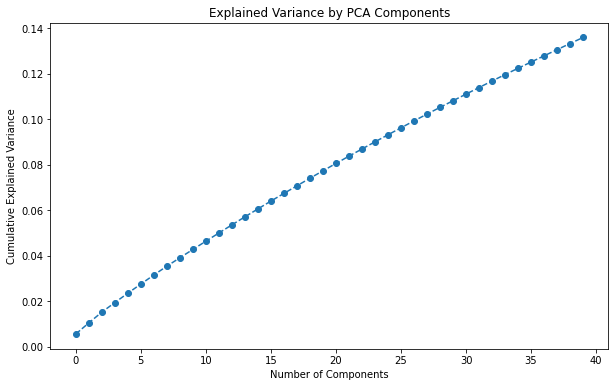

In [302]:
# # Visualizing PCA Explained Variance
# plt.figure(figsize=(10, 6))
# plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
# plt.xlabel('Number of Components')
# plt.ylabel('Cumulative Explained Variance')
# plt.title('Explained Variance by PCA Components')
# plt.show()

**Part 4**

Get the test sample for prediction and submit your results on Kaggle to get your Kaggle score screenshot. Show the screenshot in the PDF file.

In [314]:
df_test = pd.read_csv(url_test, index_col=0)

df_test.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40
ID,,,,,,,,,,,,,,,,,,,,,
1400,1.383526,-0.604793,1.229863,-0.001352,-1.091974,-0.183959,-0.382246,-0.585346,0.551234,-0.398677,...,-1.910952,1.880733,-1.707715,0.132710,-0.711017,-0.068873,-0.412101,0.718531,-0.046361,0.910999
1401,-1.805525,-1.209279,1.105605,-0.725072,1.406829,0.277594,0.351573,0.301992,-0.895749,-1.252861,...,-0.187775,0.321442,0.608835,0.133486,0.860403,0.545383,-0.469797,2.558656,-0.042992,0.299610
1402,-1.283231,0.378460,-1.042752,-0.392231,-0.152843,-0.150497,0.323036,-0.334631,-0.915000,-0.462906,...,0.063054,-0.673070,-0.165475,-0.925128,0.435305,-0.069939,-1.830001,0.654577,-0.586005,2.719760
1403,-1.429619,-1.219039,0.271909,-1.200966,-1.862797,-0.976227,0.502075,0.371877,-0.909261,0.452577,...,1.948860,-0.133037,0.192492,-0.809552,-0.847134,-0.449216,0.367976,-0.584823,-0.938930,0.800756
1404,1.050303,-0.287341,1.076935,-1.607133,2.728414,0.295277,-2.175289,-1.336138,-0.652193,-0.685130,...,1.204753,1.024312,-0.388220,0.480520,-2.318158,0.096818,-2.005192,-0.543147,0.427429,1.666733


Preprocess new data

In [315]:
# Preprocess new data
X_new = df_test
X_new_poly = poly.fit_transform(X_new)
X_new_scaled = scaler.fit_transform(X_new_poly)

In [316]:
# Load the model
best_model = grid_elastic_net.best_estimator_

In [317]:
# Make predictions
predictions = best_model.predict(X_new_scaled)

In [318]:
predictions_df = pd.DataFrame(predictions, columns=['Predictions']).values

In [319]:
df_submission = pd.read_csv(url_submission, index_col=0)

df_submission["Y"] = predictions_df

df_submission.head(5)

,Y
ID,
1400,2.245175
1401,-1.850599
1402,-1.513441
1403,-1.593260
1404,-1.262617


In [320]:
df_submission.to_csv('submission.csv', index=True)
print("Predictions have been saved to 'submission.csv'.")

Predictions have been saved to 'submission.csv'.
